In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


#### Check to see how many NAN/NULL values in Gender column

In [108]:
pd.isnull(df["Gender"]).value_counts()

False    35047
True     16345
Name: Gender, dtype: int64

#### Copy of Master DataFrame for further Gender based analysis

In [109]:
df_2_gender = copy.deepcopy(df)
df_2_gender.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Diversity & Inclusion (Analysis based on response from Female respondents)

In [110]:
df_2_gender = df_2_gender[df_2_gender['Gender'].notna()]
df_2_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35047 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 41.4+ MB


In [111]:
df_2_gender_subset = df_2_gender[['Gender','Country','Race','CompanySize','HomeRemote','Professional','University',
                                  'FormalEducation','EmploymentStatus','HighestEducationParents','JobSatisfaction','CareerSatisfaction']]
#df_2_gender_subset.head(10)

In [112]:
df_2_gender_subset.isnull().sum()

Gender                        0
Country                       0
Race                       2233
CompanySize                7760
HomeRemote                 4077
Professional                  0
University                    0
FormalEducation               0
EmploymentStatus              0
HighestEducationParents     423
JobSatisfaction            6032
CareerSatisfaction         4568
dtype: int64

## How much % of Stack overflow feedback is provided by Female & Male.

In [113]:
cous_gender_vals = df_2_gender_subset.Gender.value_counts()
#cous_gender_vals
male_count = cous_gender_vals[0]
female_count = cous_gender_vals[1]

val_count = df_2_gender_subset.shape[0]
Perc_male_feedback = (male_count/val_count)*100
Perc_male_feedback

90.13324963620282

In [114]:
val_count = df_2_gender_subset.shape[0]
Perc_female_feedback = (female_count/val_count)*100
Perc_female_feedback

7.4186092960881105

#### Approx. 90% of feedback is provided by male and approx. 8% is provided by female. 

# Since we know % feedback by female so now we drill down few columns to understand their profession, employment status, Acadmics background, Job and Career Satisfaction.

In [115]:
df_female_data = df_2_gender_subset.loc[df_2_gender_subset['Gender'] == 'Female']

In [116]:
df_female_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 10 to 51385
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   2600 non-null   object 
 1   Country                  2600 non-null   object 
 2   Race                     2410 non-null   object 
 3   CompanySize              2150 non-null   object 
 4   HomeRemote               2314 non-null   object 
 5   Professional             2600 non-null   object 
 6   University               2600 non-null   object 
 7   FormalEducation          2600 non-null   object 
 8   EmploymentStatus         2600 non-null   object 
 9   HighestEducationParents  2576 non-null   object 
 10  JobSatisfaction          2130 non-null   float64
 11  CareerSatisfaction       2237 non-null   float64
dtypes: float64(2), object(10)
memory usage: 264.1+ KB


In [117]:
df_female_data.Professional.value_counts()

Professional developer                                  1842
Student                                                  353
Professional non-developer who sometimes writes code     327
Used to be a professional developer                       52
None of these                                             26
Name: Professional, dtype: int64

Most of the female are either professional delveloper or was in developer area. Developer roles provide flexibility, better work-life balance, non-shift timings, continuos enhancement options. So it could be preferred choice for Female employees. 

In [118]:
Perc_female_cmpysize = df_female_data.CompanySize.value_counts()
Perc_female_cmpysize
val_count=0
for i in range(7):
      val_count = val_count + Perc_female_cmpysize[i] 
#print (val_count)
total_val_count = df_female_data.shape[0]
#total_val_count
Perc_female_cmpysize = (val_count/total_val_count)*100
Perc_female_cmpysize

75.5

#### Above statistics shows that approx. 76% Female works in Small to Medium scale company (Based of no. of employees).

In [119]:
Perc_female_EmploymentStatus = df_female_data.EmploymentStatus.value_counts()
val_count=0
for i in range(3):
      val_count = val_count + Perc_female_EmploymentStatus[i] 
#print (val_count)
total_val_count = df_female_data.shape[0]
#total_val_count
Perc_female_EmploymentStatus = (val_count/total_val_count)*100
Perc_female_EmploymentStatus

89.57692307692308

In [120]:
Perc_female_cmpysize1 = df_female_data.CompanySize.value_counts()
Perc_female_cmpysize1

20 to 99 employees          488
100 to 499 employees        399
10,000 or more employees    319
1,000 to 4,999 employees    232
10 to 19 employees          199
Fewer than 10 employees     166
500 to 999 employees        160
5,000 to 9,999 employees     89
I don't know                 69
I prefer not to answer       29
Name: CompanySize, dtype: int64

#### Above statistics shows that approx. 90% female is either full-time/part-time/self-employed.

In [121]:
Perc_female_FormalEducation = df_female_data.FormalEducation.value_counts()
val_count=0
for i in range(6):
      val_count = val_count + Perc_female_FormalEducation[i] 
#print (val_count)
total_val_count = df_female_data.shape[0]
#total_val_count
Perc_female_FormalEducation = (val_count/total_val_count)*100
Perc_female_FormalEducation

99.03846153846155

In [122]:
Perc_female_FormalEducation1 = df_female_data.FormalEducation.value_counts()
Perc_female_FormalEducation1

Bachelor's degree                                                    1321
Master's degree                                                       690
Some college/university study without earning a bachelor's degree     292
Secondary school                                                      143
Doctoral degree                                                        98
Professional degree                                                    31
I prefer not to answer                                                 19
Primary/elementary school                                               4
I never completed any formal education                                  2
Name: FormalEducation, dtype: int64

In [123]:
Perc_female_ParentsEducation = df_female_data.HighestEducationParents.value_counts()
val_count=0
for i in range(6):
      val_count = val_count + Perc_female_ParentsEducation[i] 
#print (val_count)
total_val_count = df_female_data.shape[0]
#total_val_count
Perc_female_ParentsEducation = (val_count/total_val_count)*100
Perc_female_ParentsEducation

94.38461538461539

In [124]:
Perc_female_ParentsEducation1 = df_female_data.HighestEducationParents.value_counts()
Perc_female_ParentsEducation1

A bachelor's degree                                    784
A master's degree                                      633
Some college/university study, no bachelor's degree    367
High school                                            344
A doctoral degree                                      194
A professional degree                                  132
Primary/elementary school                               61
I don't know/not sure                                   29
I prefer not to answer                                  24
No education                                             8
Name: HighestEducationParents, dtype: int64


#### Above statistics shows that approx. 99% female have pursued good degrees and approx. 95% parents of those female are also pursed good degrees.  It has deep co-relation of Parent's - Child education and base platform given to them, which helped female to pursue good education followed by good career propects. 

Text(0, 0.5, 'No. of Female')

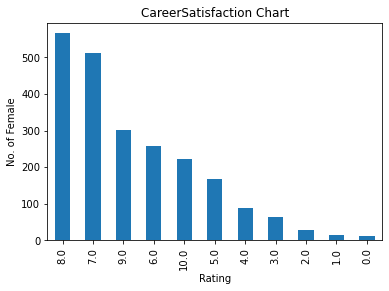

In [125]:
pd.value_counts(df_female_data['CareerSatisfaction']).plot.bar()
plt.title("CareerSatisfaction Chart")
plt.xlabel("Rating")
plt.ylabel("No. of Female")

Text(0, 0.5, 'No. of Female')

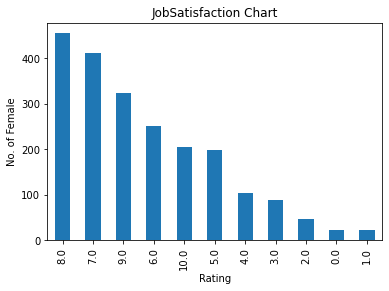

In [126]:
pd.value_counts(df_female_data['JobSatisfaction']).plot.bar()
plt.title("JobSatisfaction Chart")
plt.xlabel("Rating")
plt.ylabel("No. of Female")

##### Since we have JobSatisfaction and CareerSatisfaction rating by female respondents and above graphs show that overall satisfaction rating for both Job and Career for most of them is above 6.  Key contributors to achieve those rating could be their educational qualification and professional role. Since we have no mathmatical respresenatation of such columns so unable to prepare  mathemcatical model for prediction but above analysis clearly concluded that Parent's educational background somehow helped for broader prospect for them to pursue good degrees which in-turn helped for right career direction and roles which turned out to good satisfaction rating.

#### Feedback is provided by just 8% of whole dataset so increased % of feedack will helps to get more accurate or divserfied result. 


## Technology Prospects

In [127]:
df1 = copy.deepcopy(df)

#### Since we have 2 columns CareerSatisfaction & JobSatisfaction with 85-90% data so imputing mean() value may help to have better analysis.

In [128]:
df1['CareerSatisfaction'].fillna(value=df1['CareerSatisfaction'].mean(), inplace=True)

In [129]:
df1['JobSatisfaction'].fillna(value=df1['JobSatisfaction'].mean(), inplace=True)

#### Copy of Master DataFrame for further Technology based analysis.

In [130]:
df_2_skillset = copy.deepcopy(df1)

## Here we will analyze techonology prospect of respondents. Which development frameworks, databases, languages are being used by professionals and what is in their to-do list for learning to get better opportunity. 

#### We have created subset dataframe with columns related with above analysis.

In [131]:
df_2_skill_subset = df_2_skillset[['Professional','HaveWorkedFramework','WantWorkFramework','HaveWorkedDatabase','WantWorkDatabase',
                                  'HaveWorkedLanguage','WantWorkLanguage','CareerSatisfaction','JobSatisfaction']]

In [132]:
df_2_skill_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Professional         51392 non-null  object 
 1   HaveWorkedFramework  20229 non-null  object 
 2   WantWorkFramework    23331 non-null  object 
 3   HaveWorkedDatabase   29452 non-null  object 
 4   WantWorkDatabase     25109 non-null  object 
 5   HaveWorkedLanguage   36625 non-null  object 
 6   WantWorkLanguage     33771 non-null  object 
 7   CareerSatisfaction   51392 non-null  float64
 8   JobSatisfaction      51392 non-null  float64
dtypes: float64(2), object(7)
memory usage: 3.5+ MB


#### As we see respondent's response on these columns is not 100% and we could have used Imputing methods for these categorical columns but since missing value % is 30-60% so its not right thought to impute as it may lead to wrong conclusion. 

## Langauage based :
#### We have dropped all the rows where value is NULL or NaN becuase we cannot imput apporipate value into these categorical columns. 

In [133]:
df_2_skill_subset_lang = df_2_skill_subset.dropna(subset=['HaveWorkedLanguage','WantWorkLanguage'])
df_2_skill_subset_lang.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33465 entries, 0 to 51390
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Professional         33465 non-null  object 
 1   HaveWorkedFramework  18442 non-null  object 
 2   WantWorkFramework    22228 non-null  object 
 3   HaveWorkedDatabase   26772 non-null  object 
 4   WantWorkDatabase     24069 non-null  object 
 5   HaveWorkedLanguage   33465 non-null  object 
 6   WantWorkLanguage     33465 non-null  object 
 7   CareerSatisfaction   33465 non-null  float64
 8   JobSatisfaction      33465 non-null  float64
dtypes: float64(2), object(7)
memory usage: 2.6+ MB


#### Now we have 5 columns where value count is same so lets make some analysis.

In [134]:
grouped_multiple = df_2_skill_subset_lang.groupby(['Professional', 'HaveWorkedLanguage']).agg({'CareerSatisfaction': ['max']})
grouped_multiple.columns = ['max']
grouped_multiple = grouped_multiple.reset_index()
grouped_multiple

,Professional,HaveWorkedLanguage,max
0,None of these,Assembly,5.0
1,None of these,Assembly; C,7.0
2,None of these,Assembly; C++; C#; Java; Lua,3.0
3,None of these,Assembly; C++; C#; Java; Matlab; Python,7.0
4,None of these,Assembly; C++; Common Lisp; Elixir; Java; Java...,4.0
...,...,...,...
9822,Used to be a professional developer,SQL; VBA; Visual Basic 6,8.0
9823,Used to be a professional developer,Smalltalk,9.0
9824,Used to be a professional developer,Swift,9.0
9825,Used to be a professional developer,Swift; VB.NET,8.0


#### We thought to have group by data based on Professional and WorkedLanguage along with CareerSatisfaction rating but it seems WorkedLanguage has huge number of distinct values which created many permuation & combinations. So lets dig down distinct values into WorkedLanguage and how significant those values are.

In [135]:
df_2_skill_subset_lang.HaveWorkedLanguage.unique().tolist()

['Swift',
 'JavaScript; Python; Ruby; SQL',
 'Java; PHP; Python',
 'Matlab; Python; R; SQL',
 'JavaScript; PHP; Rust',
 'Matlab; Python',
 'CoffeeScript; Clojure; Elixir; Erlang; Haskell; JavaScript; Python; Ruby',
 'C#; JavaScript',
 'Objective-C; Swift',
 'R; SQL',
 'Java; JavaScript; Ruby; SQL',
 'Assembly; C; C++',
 'JavaScript; VB.NET',
 'JavaScript',
 'C; Clojure; JavaScript; Matlab; Rust; SQL; Swift',
 'Perl; Python',
 'C#; JavaScript; SQL',
 'Java',
 'PHP; SQL',
 'Java; Scala',
 'Java; JavaScript; Objective-C; Python; Swift',
 'JavaScript; Python',
 'C#; Java',
 'Assembly; C',
 'C#; JavaScript; Matlab; Python; R',
 'C#; F#; JavaScript; SQL',
 'C#; Java; JavaScript',
 'C#; JavaScript; SQL; TypeScript',
 'C; C++; JavaScript; Lua; Python',
 'Java; JavaScript; SQL',
 'Java; JavaScript; SQL; VBA',
 'C++; C#; Java; JavaScript; Lua; SQL',
 'JavaScript; Ruby',
 'C#; Java; SQL',
 'Assembly; C++; Groovy; Java; Perl; SQL',
 'Java; JavaScript; PHP; Ruby',
 'Java; JavaScript',
 'Java; JavaS

#### Above shows unique() values into HaveWorkedLanguage column, Though they could be unique but reviewing those values show same keywords being used in combination of other keywords. For ex. Java, JavaScript, SQL, C, C++, Ruby etc. Definately no. of Languages are quite limited in market and they can be presented in better way than this, which will make analysis better. 

Text(0, 0.5, 'No. of Respondents')

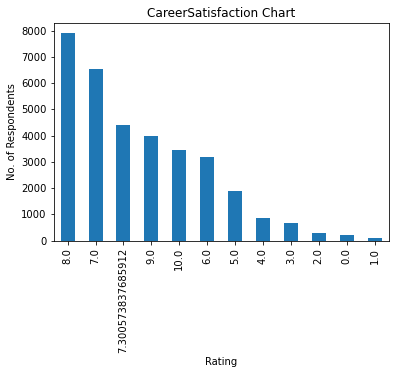

In [136]:
pd.value_counts(df_2_skill_subset_lang['CareerSatisfaction']).plot.bar()
plt.title("CareerSatisfaction Chart")
plt.xlabel("Rating")
plt.ylabel("No. of Respondents")

Text(0, 0.5, 'No. of Respondents')

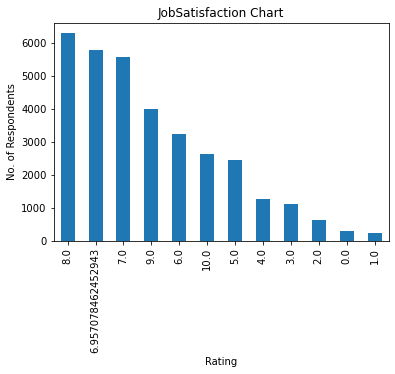

In [137]:
pd.value_counts(df_2_skill_subset_lang['JobSatisfaction']).plot.bar()
plt.title("JobSatisfaction Chart")
plt.xlabel("Rating")
plt.ylabel("No. of Respondents")

#### In above garphs, Job & Career satisfaction rating is above 5 for approx. 85-90% of respondents and we filtered data based on Tech. Languages used by those respondents in day-2-day work. So we can conclude that those languages are still popular in industry and having good job market. Now we will see which language is most popular among respondents. 

In [138]:
df_2_skill_subset_lang.HaveWorkedLanguage.value_counts()

C#; JavaScript; SQL                                                         1175
JavaScript; PHP; SQL                                                        1040
Java                                                                         812
JavaScript                                                                   748
JavaScript; PHP                                                              594
                                                                            ... 
C; C++; C#; Matlab; Objective-C; Perl; PHP; Ruby; SQL; Swift; TypeScript       1
C++; C#; Java; JavaScript; Lua; PHP; SQL; TypeScript                           1
Assembly; C; Go; Python                                                        1
C; C#; Go; Java; JavaScript; Scala                                             1
C#; JavaScript; PHP; Python; R; SQL                                            1
Name: HaveWorkedLanguage, Length: 7845, dtype: int64

#### From above, we can see Java, JavaScript, PHP, SQL, C# and their combination is most popular languages by respondants.

In [139]:
df_2_skill_subset_lang.WantWorkLanguage.value_counts()

JavaScript                                                             633
Python                                                                 543
Java                                                                   537
C#                                                                     466
C#; JavaScript; SQL                                                    443
                                                                      ... 
Assembly; C; C++; CoffeeScript; JavaScript; PHP; Python; SQL; Swift      1
C; C++; C#; Java; JavaScript; Lua; SQL; Swift                            1
Assembly; Python; Visual Basic 6                                         1
C; Java; JavaScript; Ruby; Scala; SQL                                    1
C#; Java; JavaScript; PHP; Python; Ruby; SQL; Visual Basic 6             1
Name: WantWorkLanguage, Length: 11183, dtype: int64

#### Here we also see that Java, JavaScript, SQL, C# are still choice of learning along with Python as it is fast emerging progamming language for Coding and analysis.

##  Database Technology based:
#### We have dropped all the rows where value is NULL or NaN becuase we cannot imput apporipate value into these categorical columns.

In [140]:
df_2_skill_subset_DB = df_2_skill_subset.dropna(subset=['HaveWorkedDatabase','WantWorkDatabase'])
df_2_skill_subset_DB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23355 entries, 1 to 51388
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Professional         23355 non-null  object 
 1   HaveWorkedFramework  14514 non-null  object 
 2   WantWorkFramework    17617 non-null  object 
 3   HaveWorkedDatabase   23355 non-null  object 
 4   WantWorkDatabase     23355 non-null  object 
 5   HaveWorkedLanguage   23242 non-null  object 
 6   WantWorkLanguage     22538 non-null  object 
 7   CareerSatisfaction   23355 non-null  float64
 8   JobSatisfaction      23355 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.8+ MB


In [141]:
grouped_multiple_db = df_2_skill_subset_lang.groupby(['Professional', 'HaveWorkedDatabase']).agg({'CareerSatisfaction': ['max']})
grouped_multiple_db.columns = ['max']
grouped_multiple_db = grouped_multiple_db.reset_index()
grouped_multiple_db

,Professional,HaveWorkedDatabase,max
0,None of these,Cassandra; MongoDB; MySQL,7.0
1,None of these,Cassandra; MongoDB; Redis; SQL Server; MySQL; ...,10.0
2,None of these,Cassandra; MySQL,6.0
3,None of these,Cassandra; PostgreSQL,8.0
4,None of these,Cassandra; Redis; MySQL; PostgreSQL; SQLite,3.0
...,...,...,...
610,Used to be a professional developer,SQL Server; Oracle; SQLite,8.0
611,Used to be a professional developer,SQL Server; PostgreSQL,10.0
612,Used to be a professional developer,SQL Server; PostgreSQL; Oracle,9.0
613,Used to be a professional developer,SQL Server; SQLite,10.0


In [142]:
df_2_skill_subset_DB.HaveWorkedDatabase.unique().tolist()

['MySQL; SQLite',
 'MongoDB; Redis; SQL Server; MySQL; SQLite',
 'SQLite',
 'SQL Server',
 'Redis; MySQL; PostgreSQL',
 'MySQL',
 'Cassandra; MySQL',
 'MongoDB; MySQL',
 'MongoDB',
 'Cassandra; MongoDB; Redis; SQL Server; PostgreSQL',
 'SQL Server; SQLite',
 'SQL Server; MySQL; Oracle',
 'MongoDB; Redis; MySQL; PostgreSQL; SQLite',
 'MongoDB; SQL Server; Oracle',
 'MongoDB; PostgreSQL; Oracle; SQLite',
 'Redis; MySQL',
 'Redis; SQL Server; MySQL',
 'SQL Server; MySQL; PostgreSQL; Oracle; SQLite',
 'MongoDB; Redis; MySQL',
 'Redis; PostgreSQL',
 'Cassandra',
 'PostgreSQL; SQLite',
 'MySQL; Oracle; SQLite',
 'SQL Server; MySQL',
 'PostgreSQL',
 'MongoDB; Redis; PostgreSQL',
 'Oracle',
 'MySQL; Oracle',
 'SQL Server; MySQL; SQLite',
 'Cassandra; Redis; MySQL',
 'Redis; MySQL; SQLite',
 'MongoDB; SQL Server; MySQL',
 'SQL Server; Oracle',
 'Redis; MySQL; PostgreSQL; SQLite',
 'Redis',
 'MySQL; PostgreSQL',
 'MongoDB; Redis; MySQL; PostgreSQL',
 'Redis; SQL Server; Oracle',
 'MongoDB; Redis

#### Above shows unique() values into HaveWorkedDatabase column, Though they could be unique but reviewing those values show same keywords being used in combination of other keywords. For ex. MySql, Oracle, SQL server, MongoDB, PostgreSQL,Cassandra  etc. Definately no. of Database tech. are quite limited in market and they can be presented in better way than this, which will make analysis better.

Text(0, 0.5, 'No. of Respondents')

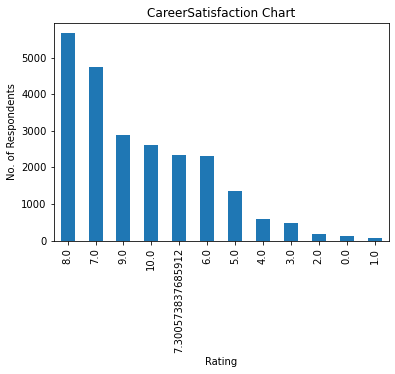

In [143]:
pd.value_counts(df_2_skill_subset_DB['CareerSatisfaction']).plot.bar()
plt.title("CareerSatisfaction Chart")
plt.xlabel("Rating")
plt.ylabel("No. of Respondents")

Text(0, 0.5, 'No. of Respondents')

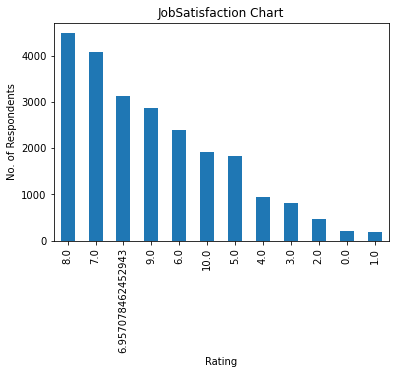

In [144]:
pd.value_counts(df_2_skill_subset_DB['JobSatisfaction']).plot.bar()
plt.title("JobSatisfaction Chart")
plt.xlabel("Rating")
plt.ylabel("No. of Respondents")

#### In above garphs, Job & Career satisfaction rating is above 5 for approx. 85-90% of respondents and we filtered data based on DB Tech. Languages used by those respondents in day-2-day work. So we can conclude that those languages are still popular in industry and having good job market. Now we will see which language is most popular among respondents.

In [145]:
df_2_skill_subset_DB.HaveWorkedDatabase.value_counts()

MySQL                                                3252
SQL Server                                           3030
SQL Server; MySQL                                    1214
PostgreSQL                                            987
MySQL; SQLite                                         984
                                                     ... 
Cassandra; SQL Server; PostgreSQL; Oracle; SQLite       1
Cassandra; PostgreSQL; Oracle; SQLite                   1
Cassandra; Redis; SQL Server; PostgreSQL; Oracle        1
Cassandra; MongoDB; SQLite                              1
MongoDB; Redis; SQL Server; Oracle; SQLite              1
Name: HaveWorkedDatabase, Length: 230, dtype: int64

#### From above, we can see MySQL, SQL Server,PostgreSQL and their combination is very popular DB platform used by respondants and in industry. 


In [146]:
df_2_skill_subset_DB.WantWorkDatabase.value_counts()

SQL Server                                                  1941
MySQL                                                       1806
MongoDB                                                     1689
PostgreSQL                                                  1437
MongoDB; MySQL                                               716
                                                            ... 
Cassandra; SQL Server; PostgreSQL; SQLite                      1
Cassandra; SQL Server; PostgreSQL; Oracle                      1
Cassandra; Redis; SQL Server; PostgreSQL; Oracle; SQLite       1
Cassandra; MySQL; PostgreSQL; Oracle                           1
Cassandra; MongoDB; SQL Server; PostgreSQL; SQLite             1
Name: WantWorkDatabase, Length: 248, dtype: int64

#### Though SQL Server is still maintaining its popularity for leanring but open source DB tech like Mongo, Cassandra, PostgreSQL are also key DB tech., respondents want to learn. It shows another propect that Industry is also moving from Traditional DB Tech. like MSSQL/ Oracle/ Sybase to Open Source, less expensive and light weight DB tech. 

## Framework based:
#### We have dropped all the rows where value is NULL or NaN becuase we cannot imput apporipate value into these categorical columns.

In [147]:
df_2_skill_subset_Fwork = df_2_skill_subset.dropna(subset=['HaveWorkedFramework','WantWorkFramework'])
df_2_skill_subset_Fwork.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16571 entries, 1 to 51387
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Professional         16571 non-null  object 
 1   HaveWorkedFramework  16571 non-null  object 
 2   WantWorkFramework    16571 non-null  object 
 3   HaveWorkedDatabase   14838 non-null  object 
 4   WantWorkDatabase     13617 non-null  object 
 5   HaveWorkedLanguage   16522 non-null  object 
 6   WantWorkLanguage     15972 non-null  object 
 7   CareerSatisfaction   16571 non-null  float64
 8   JobSatisfaction      16571 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.3+ MB


#### Responds response on Framework technology is very less as compare to database and language but we still try to make some observations .

In [148]:
grouped_multiple_fwork = df_2_skill_subset_Fwork.groupby(['Professional', 'HaveWorkedFramework']).agg({'CareerSatisfaction': ['max']})
grouped_multiple_fwork.columns = ['max']
grouped_multiple_fwork = grouped_multiple_fwork.reset_index()
grouped_multiple_fwork

,Professional,HaveWorkedFramework,max
0,None of these,.NET Core,10.0
1,None of these,AngularJS,10.0
2,None of these,AngularJS; .NET Core,7.0
3,None of these,AngularJS; Cordova; Xamarin; .NET Core,8.0
4,None of these,AngularJS; Firebase,10.0
...,...,...,...
551,Used to be a professional developer,React,8.0
552,Used to be a professional developer,React; Spark,8.0
553,Used to be a professional developer,Spark,9.0
554,Used to be a professional developer,Xamarin,8.0


In [149]:
df_2_skill_subset_Fwork.HaveWorkedFramework.unique().tolist()

['.NET Core',
 'React',
 'AngularJS; Node.js; .NET Core',
 'AngularJS',
 'Hadoop; Spark',
 'Spark',
 'Hadoop; Node.js',
 'Node.js; React; Firebase',
 'AngularJS; .NET Core',
 'Node.js; .NET Core',
 'Node.js',
 'AngularJS; Node.js',
 'Cordova; Xamarin; .NET Core',
 'Node.js; React',
 'Xamarin',
 'AngularJS; Node.js; Cordova',
 'AngularJS; Node.js; Firebase; .NET Core',
 'AngularJS; Node.js; React',
 'Node.js; React; Spark; Xamarin',
 'AngularJS; Hadoop; Node.js; React',
 'React; Spark',
 'Node.js; Cordova',
 'Firebase',
 'Xamarin; .NET Core',
 'AngularJS; Node.js; React; Cordova; Xamarin; Firebase; .NET Core',
 'React; .NET Core',
 'AngularJS; Hadoop; Cordova; Firebase',
 'Hadoop; .NET Core',
 'AngularJS; Hadoop; Node.js; Spark',
 'AngularJS; Hadoop; Node.js; React; Spark',
 'AngularJS; Node.js; Cordova; Xamarin; .NET Core',
 'AngularJS; Cordova',
 'AngularJS; Node.js; React; Firebase',
 'React; Firebase; .NET Core',
 'AngularJS; Node.js; React; .NET Core',
 'Node.js; Xamarin',
 'Node.j

#### Above shows unique() values into HaveWorkedFramework column, Though they could be unique but reviewing those values show same keywords being used in combination of other keywords. For ex. AngularJS, .NET Core, React, Spark etc. Definately no. of Framework tech. are quite limited in market and they can be presented in better way than this, which will make analysis better.

Text(0, 0.5, 'No. of Respondents')

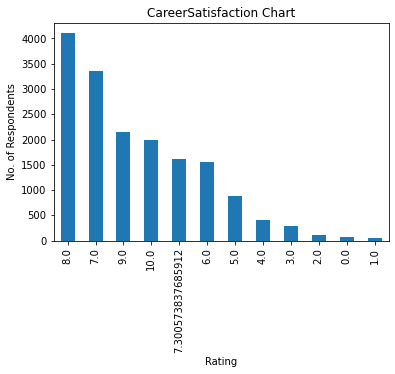

In [150]:
pd.value_counts(df_2_skill_subset_Fwork['CareerSatisfaction']).plot.bar()
plt.title("CareerSatisfaction Chart")
plt.xlabel("Rating")
plt.ylabel("No. of Respondents")

Text(0, 0.5, 'No. of Respondents')

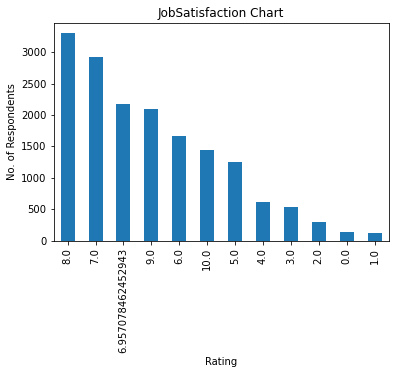

In [151]:
pd.value_counts(df_2_skill_subset_Fwork['JobSatisfaction']).plot.bar()
plt.title("JobSatisfaction Chart")
plt.xlabel("Rating")
plt.ylabel("No. of Respondents")

#### In above garphs, Job & Career satisfaction rating is above 5 for approx. 85-90% of respondents and we filtered data based on Framework Tech. used by those respondents in day-2-day work. So we can conclude that those languages are still popular in industry and having good job market. Now we will see which language is most popular among respondents.

In [152]:
df_2_skill_subset_DB.HaveWorkedFramework.value_counts()

.NET Core                                               2169
AngularJS                                               1702
Node.js                                                 1422
AngularJS; Node.js                                      1399
Node.js; React                                           678
                                                        ... 
Node.js; Cordova; Firebase; .NET Core                      1
Hadoop; Node.js; React; Spark; Xamarin; .NET Core          1
AngularJS; Node.js; Spark; Cordova; Firebase               1
React; Cordova; Firebase; .NET Core                        1
Hadoop; React; Cordova; Xamarin; Firebase; .NET Core       1
Name: HaveWorkedFramework, Length: 261, dtype: int64

In [153]:
df_2_skill_subset_DB.WantWorkFramework.value_counts()

.NET Core                                                 1387
Node.js; React                                            1051
AngularJS; Node.js                                        1043
Node.js                                                   1026
AngularJS; Node.js; React                                  877
                                                          ... 
Hadoop; React; Cordova; Xamarin                              1
AngularJS; Node.js; Spark; Cordova; Xamarin; .NET Core       1
AngularJS; Hadoop; Spark; Xamarin                            1
React; Spark; Cordova                                        1
Spark; Cordova; Xamarin; .NET Core                           1
Name: WantWorkFramework, Length: 397, dtype: int64

#### Here we see .NET Core and Angular JS are most preffered Framework in both already known and want to learn list. So they could be dominant framework in Industry which made them very popular. There are other frameworks like React, Spark, Hadoop which is also gaining popularity but in combination with .Net/Angular.

## Analysis of Job Assessment parameters 

#### Creating copy from master data frame

In [154]:
df_2_JobAssess = copy.deepcopy(df)

In [155]:
df_2_JobAssess_subset = df_2_JobAssess[['Professional','AssessJobCommute','AssessJobCompensation','AssessJobDept',
                                        'AssessJobDiversity','AssessJobExp','AssessJobFinances','AssessJobIndustry',
                                        'AssessJobLeaders','AssessJobOffice','AssessJobProduct','AssessJobRemote',
                                        'AssessJobProfDevel','AssessJobRole','CareerSatisfaction','JobSatisfaction']]

In [156]:
df_2_JobAssess_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Professional           51392 non-null  object 
 1   AssessJobCommute       21973 non-null  object 
 2   AssessJobCompensation  22146 non-null  object 
 3   AssessJobDept          22123 non-null  object 
 4   AssessJobDiversity     21978 non-null  object 
 5   AssessJobExp           22136 non-null  object 
 6   AssessJobFinances      22023 non-null  object 
 7   AssessJobIndustry      22130 non-null  object 
 8   AssessJobLeaders       21986 non-null  object 
 9   AssessJobOffice        22004 non-null  object 
 10  AssessJobProduct       21997 non-null  object 
 11  AssessJobRemote        22020 non-null  object 
 12  AssessJobProfDevel     21998 non-null  object 
 13  AssessJobRole          22147 non-null  object 
 14  CareerSatisfaction     42695 non-null  float64
 15  Jo

#### We have noticed 60% NAN or NULL values into Assessment related columns and imputing String values would not be possible, so for now we will keep only values with some response.

In [157]:
df_2_JobAssess_subset.isnull().sum()

Professional                 0
AssessJobCommute         29419
AssessJobCompensation    29246
AssessJobDept            29269
AssessJobDiversity       29414
AssessJobExp             29256
AssessJobFinances        29369
AssessJobIndustry        29262
AssessJobLeaders         29406
AssessJobOffice          29388
AssessJobProduct         29395
AssessJobRemote          29372
AssessJobProfDevel       29394
AssessJobRole            29245
CareerSatisfaction        8697
JobSatisfaction          11016
dtype: int64

#### Response of Assessment questions for Job is not great and its just 40-45% of total response. Since these columns are non-numeric and each column has approx. 60% missing data so imputing some value would result in wrong analysis. Rather we drop rows with NULL or NAN values from other columns to have consistent data set for further analysis

In [158]:
df_2_JobAssess_subset1 = df_2_JobAssess_subset.dropna(subset=['AssessJobCompensation'])
df_2_JobAssess_subset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22146 entries, 0 to 51391
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Professional           22146 non-null  object 
 1   AssessJobCommute       21517 non-null  object 
 2   AssessJobCompensation  22146 non-null  object 
 3   AssessJobDept          22033 non-null  object 
 4   AssessJobDiversity     21521 non-null  object 
 5   AssessJobExp           22048 non-null  object 
 6   AssessJobFinances      21559 non-null  object 
 7   AssessJobIndustry      22043 non-null  object 
 8   AssessJobLeaders       21529 non-null  object 
 9   AssessJobOffice        21535 non-null  object 
 10  AssessJobProduct       21533 non-null  object 
 11  AssessJobRemote        21550 non-null  object 
 12  AssessJobProfDevel     21533 non-null  object 
 13  AssessJobRole          22055 non-null  object 
 14  CareerSatisfaction     19042 non-null  float64
 15  Jo

#### Now we have columns are very less missing values so analysis can be carried on

In [159]:
df_2_JobAssess_subset1.AssessJobCommute.value_counts()

Important               8133
Very important          6857
Somewhat important      4980
Not very important      1284
Not at all important     263
Name: AssessJobCommute, dtype: int64

## Since Assessment has many columns to cover various aspects but few columns have relationship or certain impact on values of other columns. So we thought of below columns with some relationships. 

#### AssessJobOffice & AssessJobDiversity >> Response is focused on will office environment matters or not and definately diversity is one aspect of it. 

#### AssessJobFinances & AssessJobLeaders >> Financial status of Organization/Capitals, Revenue etc. and leaders has close connections. 

#### AssessJobExp,AssessJobRole,AssessJobCompensation,AssessJobProfDevel >> Key indicators of any job seeker to make firm decision. 

#### AssessJobRemote & AssessJobCommute >> More related with Flexibility and work-life balance. 

#### AssessJobIndustry,AssessJobDept,AssessJobProduct >> Respondents with Domain expertise prefer to choose industry, department like Risk/Finance, Security, R&D, Operations etc. 

## AssessJobOffice & AssessJobDiversity

<AxesSubplot:xlabel='AssessJobOffice'>

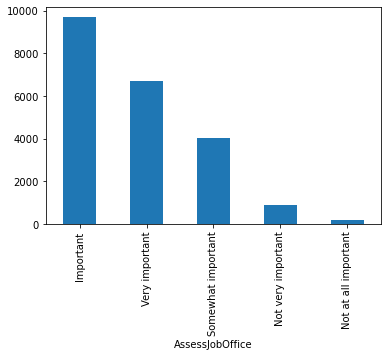

In [160]:
df_2_JobAssess_subset1.groupby('AssessJobOffice').size().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='AssessJobDiversity'>

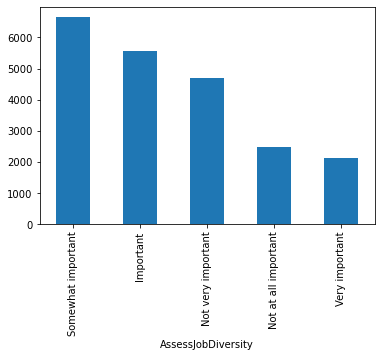

In [161]:
df_2_JobAssess_subset1.groupby('AssessJobDiversity').size().sort_values(ascending=False).plot(kind='bar')

#### Above graphs shows level of importance of Office environment and diversity. Certainly 90-95% respondents look for nice environment becuase it really help in professional performance, sustainability within company and add values into life. 

#### Another graph of Diversity shows that still for 40% of respondents, diversity does not matter a lot. Though Office environment does matter. 

## AssessJobFinances & AssessJobLeaders

<AxesSubplot:xlabel='AssessJobLeaders'>

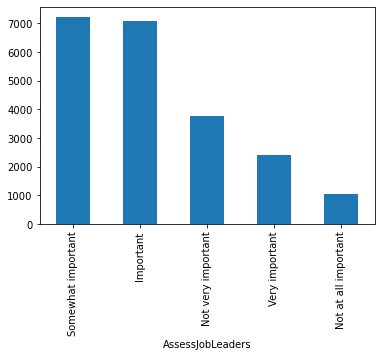

In [162]:
df_2_JobAssess_subset1.groupby('AssessJobLeaders').size().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='AssessJobFinances'>

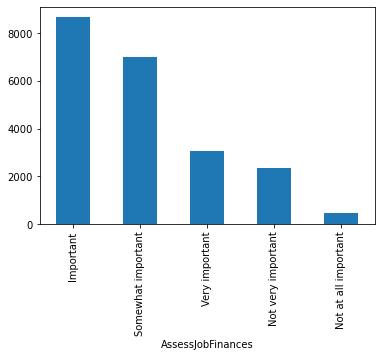

In [163]:
df_2_JobAssess_subset1.groupby('AssessJobFinances').size().sort_values(ascending=False).plot(kind='bar')

#### We can clearly see Leadership and Company financial status is key factor for 70% of respondents. Having good leadership inspire people to achieve personal and professional goals and Financial prospect reflects into quality of life. 

## AssessJobExp,AssessJobRole,AssessJobCompensation,AssessJobProfDevel

<AxesSubplot:xlabel='AssessJobExp'>

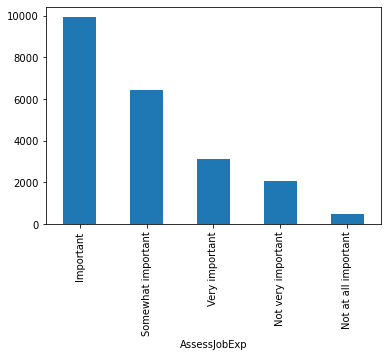

In [164]:
df_2_JobAssess_subset1.groupby('AssessJobExp').size().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='AssessJobCompensation'>

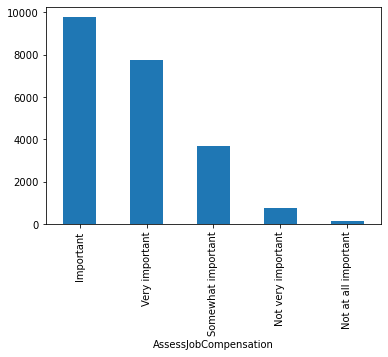

In [165]:
df_2_JobAssess_subset1.groupby('AssessJobCompensation').size().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='AssessJobRole'>

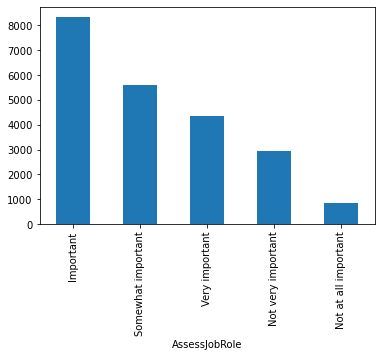

In [166]:
df_2_JobAssess_subset1.groupby('AssessJobRole').size().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='AssessJobProfDevel'>

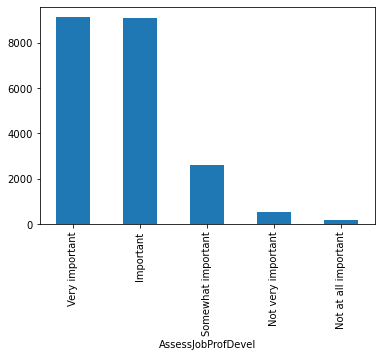

In [167]:
df_2_JobAssess_subset1.groupby('AssessJobProfDevel').size().sort_values(ascending=False).plot(kind='bar')

#### As we anticipated, these 4 factors are tightly coupled and 90% of respondents are very conscious about Job role, Prof. development path in coming year, years of expeience along with Compensation. In general, nobody wants to be at under-fit or over-fit job role as it increases Risk under cost cutting or redundancy umbrella.

## AssessJobIndustry,AssessJobDept,AssessJobProduct 

<AxesSubplot:xlabel='AssessJobIndustry'>

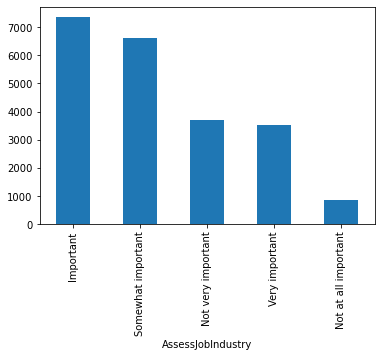

In [168]:
df_2_JobAssess_subset1.groupby('AssessJobIndustry').size().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='AssessJobDept'>

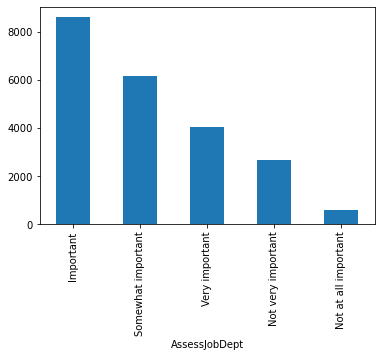

In [169]:
df_2_JobAssess_subset1.groupby('AssessJobDept').size().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='AssessJobProduct'>

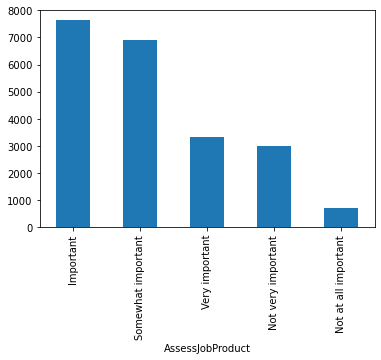

In [170]:
df_2_JobAssess_subset1.groupby('AssessJobProduct').size().sort_values(ascending=False).plot(kind='bar')

#### Respondents with Domain expertise would prefer to know about Indutry, Department or Product so that they can excel into targettted industry which helps to build nice portfolio. 

#### For ex. Developer who worked into Banking/Finance industry will have technical as well as banking Domain awareness, risk/compliance prospect, audit related controls etc. and other bank/finance companies look for those pointers into candidate,so this Techincal-Domain expertise is attrative portfolio. 

#### Above graphs shows 80% of respondents reviews it seriously and clarify in-depth prior to any decision.

## AssessJobRemote & AssessJobCommute

<AxesSubplot:xlabel='AssessJobRemote'>

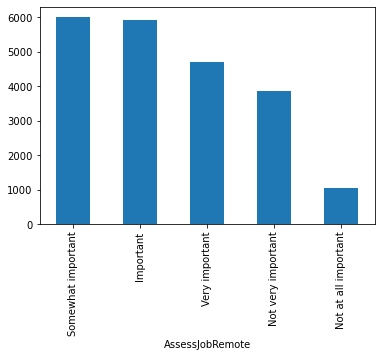

In [171]:
df_2_JobAssess_subset1.groupby('AssessJobRemote').size().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='AssessJobCommute'>

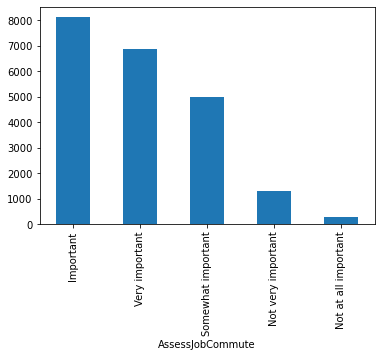

In [172]:
df_2_JobAssess_subset1.groupby('AssessJobCommute').size().sort_values(ascending=False).plot(kind='bar')

#### Now Commute and Remote working are key buzz words while assessing new Jobs as it shows how flexible company is, how much time respondent needs to spead on commute, how difficult would be commute to office, various available options for office commute etc. These also impact work-life balance so they are also considerble factors now a days. 

Text(0, 0.5, 'No. of Respondents')

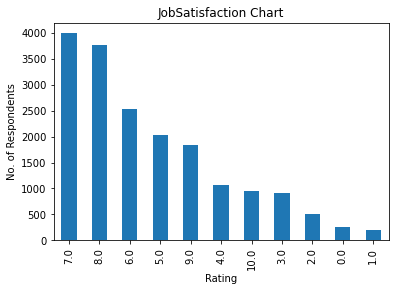

In [173]:
pd.value_counts(df_2_JobAssess_subset1['JobSatisfaction']).plot.bar()
plt.title("JobSatisfaction Chart")
plt.xlabel("Rating")
plt.ylabel("No. of Respondents")

Text(0, 0.5, 'No. of Respondents')

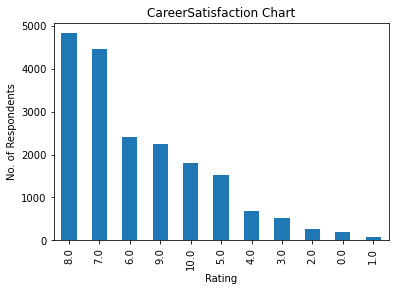

In [174]:
pd.value_counts(df_2_JobAssess_subset1['CareerSatisfaction']).plot.bar()
plt.title("CareerSatisfaction Chart")
plt.xlabel("Rating")
plt.ylabel("No. of Respondents")

#### Above graphs for Job and Career satisfaction shows that 90% respondents have given rating more than 4.
#### Now lets segregate response on basis of rating using below classification.

Excellent  (9 or 10)
Meet Expectation (7 to 8)
Average ( 5 to 6)
Below Expectation (Lower than 5)

#### Excellent  (9 or 10)
Roughly 10-15% respondent are satisfied with role,company, professionl growth, work-life balance, policies, leadership, compensation since they rated with 9 or 10. 

#### Meet Expectation (7 to 8)
Approx. 50-60% respondent are probably happy with current company/role/compensation etc. but still they look for better prospect and it could be Prof. development, Company policy, work-life balance, Diversity or Compensation etc. Those candidates will explore more opportunity into market to fulfill those gaps. 

#### Average ( 5 to 6)
Approx. 20% respondents are seriously looking for better opportunities and take decision quickly if they find betterment into few prospect like Job role, Compensation, Remote working as these factors will be increare their satisfaction to Meet Expectation. 

#### Below Expectation (Lower than 5)
Approx. 10% respondents probably are working due to some reasons but neither satifised with Job role nor career progression. There could be many reasons includes individual skill set, existing technology, department, leadership, financial aspects etc. 